<a href="https://colab.research.google.com/github/adityashah841/Sem-5/blob/main/DMW/DMW_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('/content/gender_classification_v7.csv')

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
g=[]
for i in df['gender']:
  if i=='Male':
    g.append(1)
  else:
    g.append(0)

In [8]:
df['gender'] = g

In [9]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


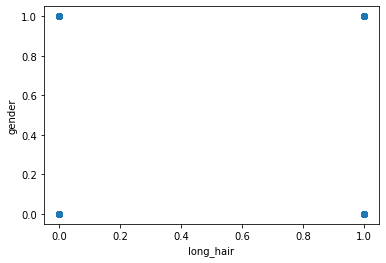

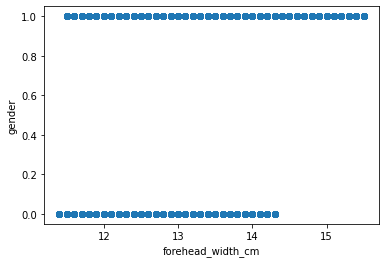

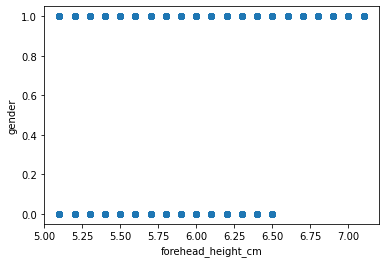

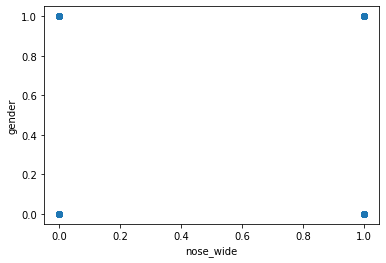

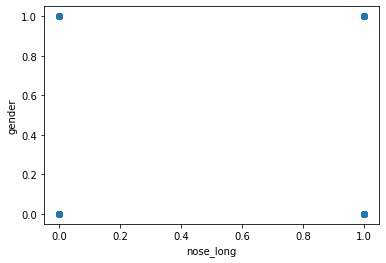

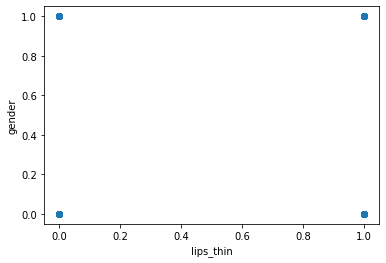

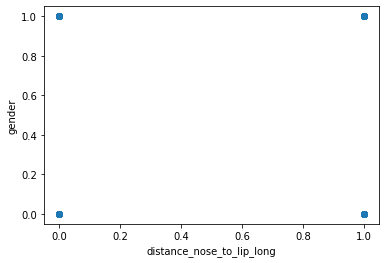

In [10]:
plt.scatter(df['long_hair'], df['gender'])
plt.ylabel('gender')
plt.xlabel('long_hair')
plt.show()
plt.scatter(df['forehead_width_cm'], df['gender'])
plt.ylabel('gender')
plt.xlabel('forehead_width_cm')
plt.show()
plt.scatter(df['forehead_height_cm'], df['gender'])
plt.ylabel('gender')
plt.xlabel('forehead_height_cm')
plt.show()
plt.scatter(df['nose_wide'], df['gender'])
plt.ylabel('gender')
plt.xlabel('nose_wide')
plt.show()
plt.scatter(df['nose_long'], df['gender'])
plt.ylabel('gender')
plt.xlabel('nose_long')
plt.show()
plt.scatter(df['lips_thin'], df['gender'])
plt.ylabel('gender')
plt.xlabel('lips_thin')
plt.show()
plt.scatter(df['distance_nose_to_lip_long'], df['gender'])
plt.ylabel('gender')
plt.xlabel('distance_nose_to_lip_long')
plt.show()

In [11]:
X = df.drop(['gender'], axis=1)
y = df['gender']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
sse=[]
for i in range(1,10):
  model = KMeans(n_clusters=i)
  model.fit(X_train, y_train)
  sse.append(model.inertia_)

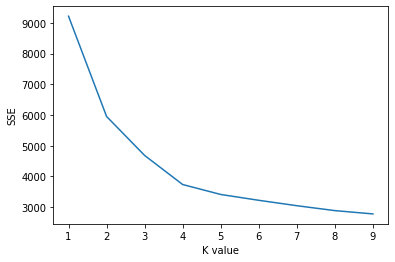

In [14]:
plt.plot(range(1,10),sse)
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show()

In [15]:
# Hence n_clusters=4
model = KMeans(n_clusters=4)
model.fit(X_train, y_train)

KMeans(n_clusters=4)

In [16]:
y_pred = model.predict(X_test)
y_pred

array([3, 2, 1, ..., 3, 3, 3], dtype=int32)

In [17]:
df2 = X_test
df2['preds'] = y_pred

In [18]:
df2.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,preds
2801,1,14.0,5.2,0,0,0,0,3
2239,1,13.2,5.4,1,1,1,1,2
3698,0,12.6,5.8,0,0,0,0,1
4587,1,11.8,6.5,0,0,1,0,1
4596,1,12.6,6.2,0,0,0,0,1


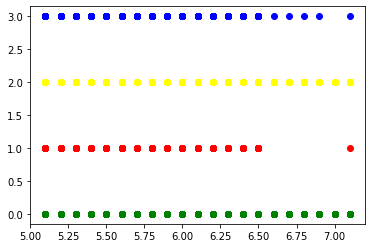

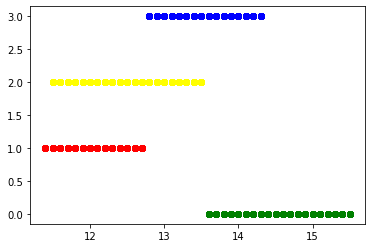

In [19]:
d1 = df2[df2.preds==0]
d2 = df2[df2.preds==1]
d3 = df2[df2.preds==2]
d4 = df2[df2.preds==3]

plt.scatter(d1.forehead_height_cm, d1.preds, color='green')
plt.scatter(d2.forehead_height_cm, d2.preds, color='red')
plt.scatter(d3.forehead_height_cm, d3.preds, color='yellow')
plt.scatter(d4.forehead_height_cm, d4.preds, color='blue')
plt.show()
plt.scatter(d1.forehead_width_cm, d1.preds, color='green')
plt.scatter(d2.forehead_width_cm, d2.preds, color='red')
plt.scatter(d3.forehead_width_cm, d3.preds, color='yellow')
plt.scatter(d4.forehead_width_cm, d4.preds, color='blue')
plt.show()

In [20]:
from sklearn.datasets import make_blobs

In [21]:
df = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [22]:
points=df[0]
import scipy.cluster.hierarchy as hr
from sklearn.cluster import AgglomerativeClustering

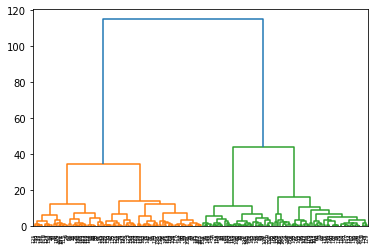

In [23]:
dendrogram = hr.dendrogram(hr.linkage(points, method='ward'))

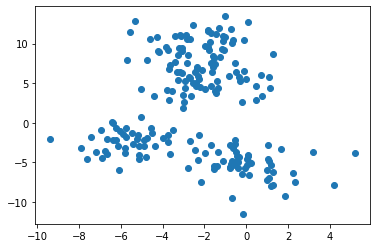

In [24]:
plt.scatter(df[0][:,0], df[0][:,1])
plt.show()

In [25]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [26]:
y_hc = hc.fit_predict(points)

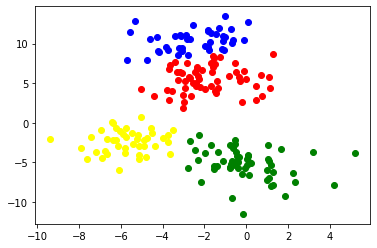

In [27]:
plt.scatter(points[y_hc==0,0], points[y_hc==0,1], color='green')
plt.scatter(points[y_hc==1,0], points[y_hc==1,1], color='red')
plt.scatter(points[y_hc==2,0], points[y_hc==2,1], color='yellow')
plt.scatter(points[y_hc==3,0], points[y_hc==3,1], color='blue')

plt.show()